In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file</h2>

In [3]:
import pandas as pd
X_train = pd.read_csv('final_features_train_w2v.csv')
X_test = pd.read_csv('final_features_test_w2v.csv')

In [4]:
X_train.head()

,Unnamed: 0,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,223376,0.399992,0.333328,0.000000,0.000000,0.222220,0.199998,0.0,0.0,...,-7.561725,5.469175,9.641156,0.049859,-3.474199,-1.583423,6.309977,-3.166468,-0.227980,2.732135
1,1,3424,0.799984,0.799984,0.999986,0.999986,0.916659,0.916659,0.0,1.0,...,-5.174814,4.913876,-2.253159,0.590060,4.851017,-1.218222,0.153283,-6.459026,-2.052982,-5.206891
2,2,103225,0.999975,0.799984,0.749981,0.599988,0.874989,0.699993,1.0,1.0,...,-3.454194,4.484399,-0.657400,14.923505,2.705789,-1.818421,4.733529,-11.371474,-4.500406,0.054162
3,3,227557,0.999967,0.999967,0.799984,0.799984,0.874989,0.874989,1.0,1.0,...,-4.558323,3.436291,-2.717695,6.491576,0.691769,-0.642515,-1.580434,-8.119396,-1.319180,-3.253701
4,4,299469,0.666644,0.666644,0.499988,0.499988,0.571420,0.571420,0.0,1.0,...,-2.600715,5.976060,-1.122397,7.530760,1.579796,-2.357786,-0.894333,-8.213677,-9.529477,-1.777605


<h2> 4.2 Same train test split( 70:30) that was performed earlier</h2>

In [5]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
y = df['is_duplicate']
y = list(map(int, y.values))
X = df.drop(['is_duplicate'], axis=1)

X_1, X_2, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [6]:
X_train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [7]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283003, 214)
Number of data points in test data : (121287, 214)


<h2> 4.3 Distribution of class label in train and test data</h2>

In [32]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308025003268517 Class 1:  0.36919749967314835
---------- Distribution of output variable in test data ----------
Class 0:  0.6308013224830361 Class 1:  0.3691986775169639


In [8]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8904198787514113


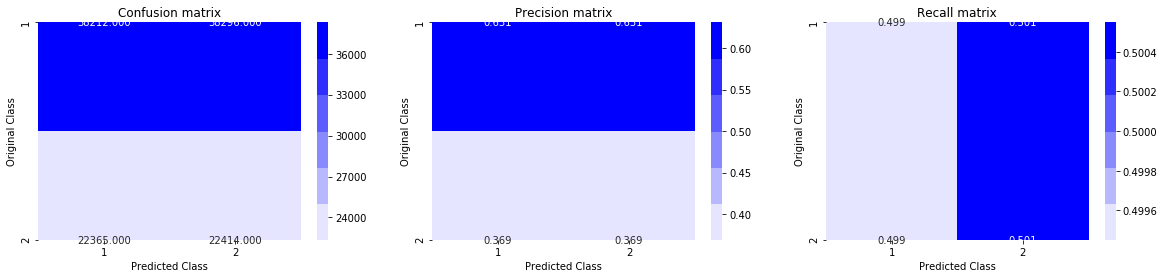

In [33]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the test data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5128596568732646
For values of alpha =  0.0001 The log loss is: 0.5096570646797678
For values of alpha =  0.001 The log loss is: 0.5261904367046817
For values of alpha =  0.01 The log loss is: 0.5184476288335651
For values of alpha =  0.1 The log loss is: 0.532910313753658
For values of alpha =  1 The log loss is: 0.5481024069741316
For values of alpha =  10 The log loss is: 0.5679581660449265


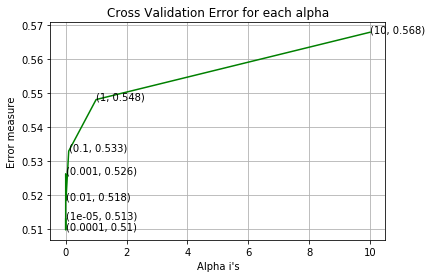

For values of best alpha =  0.0001 The train log loss is: 0.5083587048174387
For values of best alpha =  0.0001 The test log loss is: 0.5096570646797678
Total number of data points : 121287


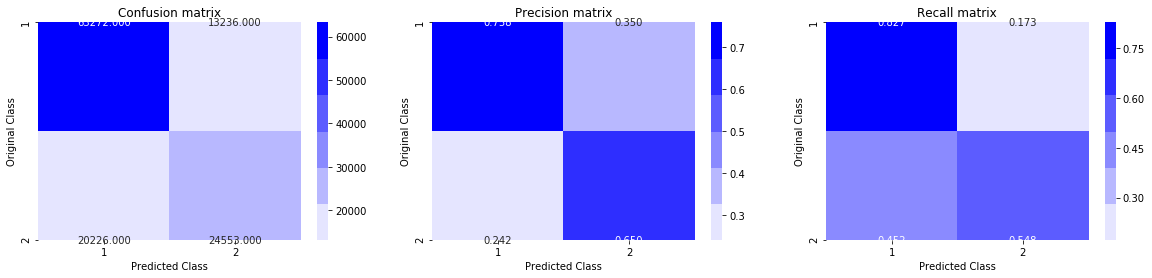

In [11]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5359824049465229
For values of alpha =  0.0001 The log loss is: 0.5149164662821728
For values of alpha =  0.001 The log loss is: 0.5122891329064184
For values of alpha =  0.01 The log loss is: 0.5239583896279372
For values of alpha =  0.1 The log loss is: 0.5589267611395161
For values of alpha =  1 The log loss is: 0.6376434486299442
For values of alpha =  10 The log loss is: 0.6412695521358854


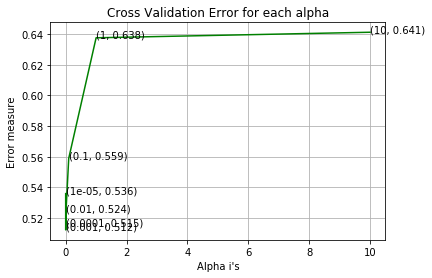

For values of best alpha =  0.001 The train log loss is: 0.5114216801769381
For values of best alpha =  0.001 The test log loss is: 0.5122891329064184
Total number of data points : 121287


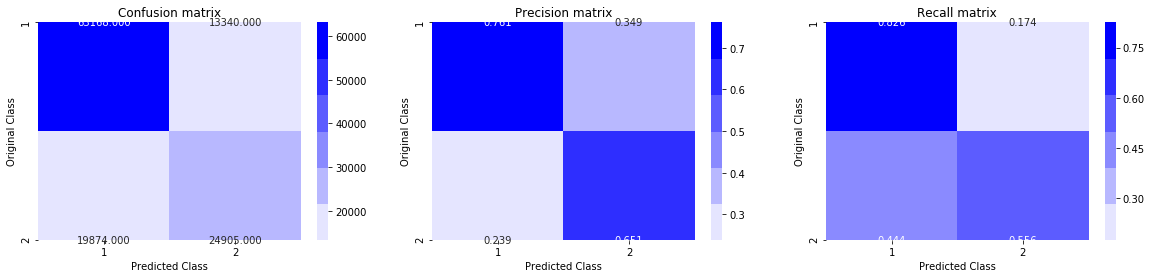

In [46]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost with hyperparameter tuning</h2>

In [12]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]

eta = [0.01, 0.02, 0.05, 0.1]
max_depth = [3, 4, 5, 6, 7, 8, 9]

#a dictionary to store all the log loss values with (eta,max_depth)'s as keys
test_log_loss = {}

for i in eta:
    for j in max_depth:
        params['eta'] = i
        params['max_depth'] = j
        
        bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
        
        xgdmat = xgb.DMatrix(X_train,y_train)
        predict_y = bst.predict(d_test)
        test_log_loss[(i,j)] = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)

[0]	train-logloss:0.69027	valid-logloss:0.69022
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.66394	valid-logloss:0.66383
[20]	train-logloss:0.64170	valid-logloss:0.64163
[30]	train-logloss:0.62260	valid-logloss:0.62254
[40]	train-logloss:0.60613	valid-logloss:0.60602
[50]	train-logloss:0.59185	valid-logloss:0.59177
[60]	train-logloss:0.57944	valid-logloss:0.57943
[70]	train-logloss:0.56875	valid-logloss:0.56868
[80]	train-logloss:0.55934	valid-logloss:0.55920
[90]	train-logloss:0.55092	valid-logloss:0.55090
[100]	train-logloss:0.54354	valid-logloss:0.54348
[110]	train-logloss:0.53685	valid-logloss:0.53683
[120]	train-logloss:0.53107	valid-logloss:0.53101
[130]	train-logloss:0.52591	valid-logloss:0.52586
[140]	train-logloss:0.52117	valid-logloss:0.52121
[150]	train-logloss:0.51698	valid-logloss:0.51698
[160]	train-logloss:0.51313	valid-logloss:0.51319
[170]	trai

[300]	train-logloss:0.44409	valid-logloss:0.44876
[310]	train-logloss:0.44276	valid-logloss:0.44754
[320]	train-logloss:0.44139	valid-logloss:0.44634
[330]	train-logloss:0.44008	valid-logloss:0.44518
[340]	train-logloss:0.43894	valid-logloss:0.44414
[350]	train-logloss:0.43764	valid-logloss:0.44301
[360]	train-logloss:0.43649	valid-logloss:0.44201
[370]	train-logloss:0.43535	valid-logloss:0.44101
[380]	train-logloss:0.43428	valid-logloss:0.44008
[390]	train-logloss:0.43327	valid-logloss:0.43921
[399]	train-logloss:0.43239	valid-logloss:0.43844
[0]	train-logloss:0.68950	valid-logloss:0.68955
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.65690	valid-logloss:0.65729
[20]	train-logloss:0.62964	valid-logloss:0.63034
[30]	train-logloss:0.60645	valid-logloss:0.60745
[40]	train-logloss:0.58626	valid-logloss:0.58759
[50]	train-logloss:0.56881	valid-logloss:0.57038
[60]	t

[190]	train-logloss:0.47448	valid-logloss:0.47533
[200]	train-logloss:0.47300	valid-logloss:0.47389
[210]	train-logloss:0.47148	valid-logloss:0.47240
[220]	train-logloss:0.47004	valid-logloss:0.47104
[230]	train-logloss:0.46868	valid-logloss:0.46974
[240]	train-logloss:0.46715	valid-logloss:0.46828
[250]	train-logloss:0.46559	valid-logloss:0.46678
[260]	train-logloss:0.46437	valid-logloss:0.46563
[270]	train-logloss:0.46298	valid-logloss:0.46433
[280]	train-logloss:0.46198	valid-logloss:0.46338
[290]	train-logloss:0.46071	valid-logloss:0.46218
[300]	train-logloss:0.45970	valid-logloss:0.46124
[310]	train-logloss:0.45848	valid-logloss:0.46008
[320]	train-logloss:0.45758	valid-logloss:0.45921
[330]	train-logloss:0.45658	valid-logloss:0.45826
[340]	train-logloss:0.45563	valid-logloss:0.45739
[350]	train-logloss:0.45470	valid-logloss:0.45651
[360]	train-logloss:0.45375	valid-logloss:0.45561
[370]	train-logloss:0.45282	valid-logloss:0.45474
[380]	train-logloss:0.45203	valid-logloss:0.45400


[80]	train-logloss:0.46916	valid-logloss:0.47405
[90]	train-logloss:0.46065	valid-logloss:0.46611
[100]	train-logloss:0.45336	valid-logloss:0.45945
[110]	train-logloss:0.44706	valid-logloss:0.45373
[120]	train-logloss:0.44176	valid-logloss:0.44902
[130]	train-logloss:0.43725	valid-logloss:0.44506
[140]	train-logloss:0.43327	valid-logloss:0.44161
[150]	train-logloss:0.42987	valid-logloss:0.43864
[160]	train-logloss:0.42694	valid-logloss:0.43612
[170]	train-logloss:0.42433	valid-logloss:0.43398
[180]	train-logloss:0.42163	valid-logloss:0.43176
[190]	train-logloss:0.41918	valid-logloss:0.42972
[200]	train-logloss:0.41662	valid-logloss:0.42773
[210]	train-logloss:0.41480	valid-logloss:0.42626
[220]	train-logloss:0.41279	valid-logloss:0.42470
[230]	train-logloss:0.41099	valid-logloss:0.42332
[240]	train-logloss:0.40926	valid-logloss:0.42205
[250]	train-logloss:0.40751	valid-logloss:0.42073
[260]	train-logloss:0.40583	valid-logloss:0.41948
[270]	train-logloss:0.40430	valid-logloss:0.41844
[2

[0]	train-logloss:0.67771	valid-logloss:0.67788
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.57867	valid-logloss:0.57875
[20]	train-logloss:0.52912	valid-logloss:0.52937
[30]	train-logloss:0.50195	valid-logloss:0.50231
[40]	train-logloss:0.48589	valid-logloss:0.48661
[50]	train-logloss:0.47568	valid-logloss:0.47667
[60]	train-logloss:0.46854	valid-logloss:0.46984
[70]	train-logloss:0.46302	valid-logloss:0.46461
[80]	train-logloss:0.45872	valid-logloss:0.46053
[90]	train-logloss:0.45485	valid-logloss:0.45690
[100]	train-logloss:0.45114	valid-logloss:0.45343
[110]	train-logloss:0.44719	valid-logloss:0.44979
[120]	train-logloss:0.44414	valid-logloss:0.44702
[130]	train-logloss:0.44169	valid-logloss:0.44481
[140]	train-logloss:0.43911	valid-logloss:0.44249
[150]	train-logloss:0.43660	valid-logloss:0.44021
[160]	train-logloss:0.43420	valid-logloss:0.43805
[170]	trai

[300]	train-logloss:0.34651	valid-logloss:0.38770
[310]	train-logloss:0.34425	valid-logloss:0.38680
[320]	train-logloss:0.34176	valid-logloss:0.38578
[330]	train-logloss:0.34009	valid-logloss:0.38508
[340]	train-logloss:0.33775	valid-logloss:0.38415
[350]	train-logloss:0.33589	valid-logloss:0.38348
[360]	train-logloss:0.33357	valid-logloss:0.38268
[370]	train-logloss:0.33161	valid-logloss:0.38189
[380]	train-logloss:0.32982	valid-logloss:0.38129
[390]	train-logloss:0.32804	valid-logloss:0.38070
[399]	train-logloss:0.32652	valid-logloss:0.38016
[0]	train-logloss:0.67466	valid-logloss:0.67495
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.55576	valid-logloss:0.55911
[20]	train-logloss:0.49590	valid-logloss:0.50215
[30]	train-logloss:0.46082	valid-logloss:0.46966
[40]	train-logloss:0.43929	valid-logloss:0.45055
[50]	train-logloss:0.42438	valid-logloss:0.43809
[60]	t

[190]	train-logloss:0.40348	valid-logloss:0.41319
[200]	train-logloss:0.40189	valid-logloss:0.41218
[210]	train-logloss:0.40018	valid-logloss:0.41092
[220]	train-logloss:0.39870	valid-logloss:0.40990
[230]	train-logloss:0.39745	valid-logloss:0.40906
[240]	train-logloss:0.39600	valid-logloss:0.40814
[250]	train-logloss:0.39480	valid-logloss:0.40743
[260]	train-logloss:0.39358	valid-logloss:0.40667
[270]	train-logloss:0.39237	valid-logloss:0.40602
[280]	train-logloss:0.39111	valid-logloss:0.40521
[290]	train-logloss:0.38987	valid-logloss:0.40445
[300]	train-logloss:0.38878	valid-logloss:0.40381
[310]	train-logloss:0.38758	valid-logloss:0.40302
[320]	train-logloss:0.38666	valid-logloss:0.40258
[330]	train-logloss:0.38555	valid-logloss:0.40194
[340]	train-logloss:0.38459	valid-logloss:0.40145
[350]	train-logloss:0.38366	valid-logloss:0.40097
[360]	train-logloss:0.38292	valid-logloss:0.40064
[370]	train-logloss:0.38187	valid-logloss:0.40007
[380]	train-logloss:0.38077	valid-logloss:0.39941


[80]	train-logloss:0.36179	valid-logloss:0.39789
[90]	train-logloss:0.35253	valid-logloss:0.39398
[100]	train-logloss:0.34463	valid-logloss:0.39070
[110]	train-logloss:0.33834	valid-logloss:0.38835
[120]	train-logloss:0.33100	valid-logloss:0.38605
[130]	train-logloss:0.32518	valid-logloss:0.38406
[140]	train-logloss:0.31876	valid-logloss:0.38180
[150]	train-logloss:0.31254	valid-logloss:0.37989
[160]	train-logloss:0.30779	valid-logloss:0.37836
[170]	train-logloss:0.30222	valid-logloss:0.37673
[180]	train-logloss:0.29654	valid-logloss:0.37496
[190]	train-logloss:0.29240	valid-logloss:0.37379
[200]	train-logloss:0.28848	valid-logloss:0.37270
[210]	train-logloss:0.28378	valid-logloss:0.37146
[220]	train-logloss:0.27885	valid-logloss:0.37016
[230]	train-logloss:0.27603	valid-logloss:0.36938
[240]	train-logloss:0.27148	valid-logloss:0.36809
[250]	train-logloss:0.26865	valid-logloss:0.36748
[260]	train-logloss:0.26335	valid-logloss:0.36625
[270]	train-logloss:0.25893	valid-logloss:0.36515
[2

In [29]:
min_logloss = (min(test_log_loss.values()))
idx = list(test_log_loss.values()).index(min_logloss)
best_params = list(test_log_loss.keys())[idx]

best_eta = best_params[0]
best_max_depth = best_params[1]

print('Best eta = ',best_eta)
print('Best max_depth = ', best_max_depth)

Best eta =  0.1
Best max_depth =  9


<h3>4.6.1 Training the model with the best hyperparameters </h3>

In [30]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = best_eta
params['max_depth'] = best_max_depth

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.65569	valid-logloss:0.65689
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.48065	valid-logloss:0.49199
[20]	train-logloss:0.42334	valid-logloss:0.44277
[30]	train-logloss:0.39693	valid-logloss:0.42288
[40]	train-logloss:0.38055	valid-logloss:0.41202
[50]	train-logloss:0.36862	valid-logloss:0.40541
[60]	train-logloss:0.35689	valid-logloss:0.39942
[70]	train-logloss:0.34685	valid-logloss:0.39473
[80]	train-logloss:0.33395	valid-logloss:0.38989
[90]	train-logloss:0.32244	valid-logloss:0.38604
[100]	train-logloss:0.31213	valid-logloss:0.38263
[110]	train-logloss:0.30353	valid-logloss:0.38005
[120]	train-logloss:0.29573	valid-logloss:0.37759
[130]	train-logloss:0.28900	valid-logloss:0.37566
[140]	train-logloss:0.28254	valid-logloss:0.37403
[150]	train-logloss:0.27431	valid-logloss:0.37210
[160]	train-logloss:0.26471	valid-logloss:0.36941
[170]	trai

Total number of data points : 121287


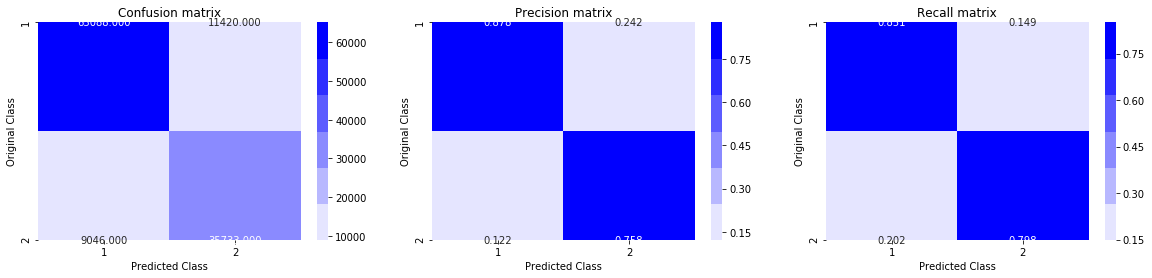

In [31]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)